#### Importing notebooks

In [1]:
%%capture
%run '01. Data Retrieval.ipynb'

#### Importing packages

In [45]:
import scipy.stats

### 1. Pearson Correlation

In [46]:
pearson_correlation = scipy.stats.pearsonr(data.bitcoin_price, data.search_volume)[0]
pearson_correlation

0.91606726054634846

### 2. Cross Correlation

In [2]:
cross_correlation = numpy.correlate(data.search_volume, data.bitcoin_price, 'full')
cross_correlation

array([  5479.89784091,   9254.50116939,  13156.03593442, ...,
          705.2563    ,    456.5473    ,    194.1184    ])

In [49]:
#shorten cross_correlation to 10 results around the center which is at 0 'delay in days'.
variance = 10
center = int(cross_correlation.size/2)
cross_correlation_subset = cross_correlation[center-variance:center+1+variance]

#normalize cross_correlation
normalized_cross_correlation_subset = cross_correlation_subset / numpy.linalg.norm(cross_correlation_subset)
normalized_cross_correlation_subset 

array([ 0.2085011 ,  0.20991412,  0.21207908,  0.21418099,  0.21707301,
        0.21948678,  0.22089461,  0.22236323,  0.2238766 ,  0.22582436,
        0.22691456,  0.22527197,  0.22353957,  0.22171298,  0.22004285,
        0.2184244 ,  0.21696494,  0.21584804,  0.21450256,  0.21282022,
        0.21094949])

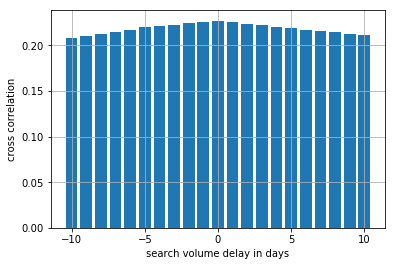

In [50]:
#plot histogram of cross correlation with shortened result set
ax = matplotlib.pyplot.subplot(111)
ax.bar(range(-variance, variance+1, 1), normalized_cross_correlation_subset)
ax.grid()
ax.set_xlabel('search volume delay in days')
ax.set_ylabel('cross correlation')

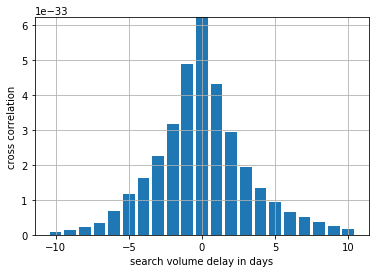

In [17]:
#calculate cross correlation result to the power of 50 to make difference more visible
#inspired by https://stackoverflow.com/a/40329682
y = [x**50 for x in normalized_cross_correlation_subset]

#plot histogram once again
ax = matplotlib.pyplot.subplot(111)
ax.bar(range(-variance,variance+1,1), y)
ax.grid()
ax.set_xlabel('search volume delay in days')
ax.set_ylabel('cross correlation')